# Chapter 9: Nonparametric Tests

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm

In [2]:
admission = pd.read_csv('../data/admission.csv')

In [3]:
def p_2tail(sampdist,tstat):
    hyp = np.mean(sampdist)
    cutoff1 = hyp - np.abs(hyp - tstat)
    cutoff2 = hyp + np.abs(hyp - tstat)
    
    points = sns.kdeplot(sampdist).get_lines()[0].get_data() # get x and y values from plot
    x = points[0]
    y = points[1]

    plt.fill_between(x,y, where = (x < cutoff1) | (x > cutoff2), color='r')
    plt.fill_between(x,y, where = (x >= cutoff1) & (x <= cutoff2), color='g')
    plt.show()
    
    pvalue = np.sum((sampdist < cutoff1) | (sampdist > cutoff2)) / len(sampdist)
    return pvalue

***Median Test*** <br>
Test where the null hypothesis (median GMAT score is 510):

In [4]:
np.random.seed(87654321)
sampsize = len(admission)
def f1():
    s1 = np.random.normal(size=sampsize, loc=510, scale=admission.std()['GMAT'])
    return np.median(s1)
sampdist = [f1() for _ in range(10000)]

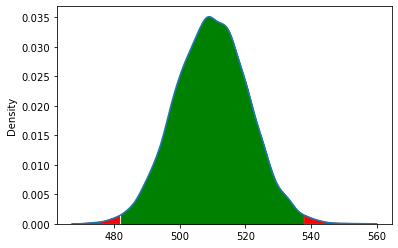

0.0118

In [5]:
tstat = admission.median()['GMAT']
p_2tail(sampdist,tstat)

Let's do the nonparametric test for median:

In [6]:
np.random.seed(87654321)
sampsize = len(admission)

def f1():
    s1 = np.random.choice([0,1], size=sampsize, replace=True, p= [.5,.5])
    return (sum(s1)/sampsize)

sampdist = [f1() for _ in range(10000)]

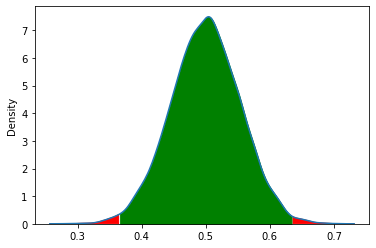

0.012

In [7]:
tstat = len(admission.loc[admission['GMAT']>510])/sampsize
p_2tail(sampdist, tstat)

Let's do a signed rank test:

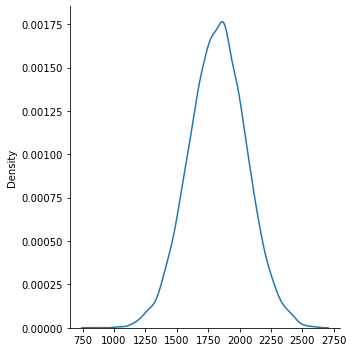

In [8]:
np.random.seed(87654321)
sampsize = len(admission)

def f1():
    s1 = np.random.choice([0,1], size=sampsize, replace=True, p= [.5,.5])
    r1 = np.linspace(1, sampsize, sampsize)
    x = sum(r1[s1==1])
    return x

sampdist = [f1() for _ in range(10000)]

sns.displot(sampdist, kind = 'kde')
plt.show()